# Table SIM_AV_TUMOUR

I am going to open the cancer registration table "SIM_AV_TUMOUR". This is the main tumour table and it contains details for each tumour registered. Each patient may have more than one tumour. This table includes tumourid, age at diagnosis, screening status, demographics, tumour site, staging, TNM staging, grade, tumour morphology, performance status, hormone receptor status, surgery date and deprivation index.

Firstly, I am going to install the dependencies that are needed and then I am going to open the pickle file that I had saved in the previous notebook (which contains the table "SIM_AV_PATIENT"). After that I am going to open the table "SIM_AV_TUMOUR". The "SIM_AV_PATIENT" table will be defined as "df" and the table "SIM_AV_TUMOUR" as "avtum".

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7,5)})
from zipfile import ZipFile

In [30]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [31]:
df = pd.read_pickle('./Data/avpat.pickle')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16


In [32]:
df.shape

(1322100, 12)

In [33]:
zf = ZipFile('../Data/sim_av_tumour.zip')
csv = zf.open('sim_av_tumour.csv')
avtum = pd.read_csv(csv, low_memory=False)
avtum.head()

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX,CREG_CODE,LINKNUMBER,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [34]:
avtum.shape

(1402817, 34)

I am going to check if the table SIM_AV_TUMOUR contains duplicate entries.

In [35]:
print(f'The original dataset has data for {len(avtum)} patients')
print(f'After removing duplicate entries, the dataset has data for {len(avtum.drop_duplicates())} patients')

The original dataset has data for 1402817 patients
After removing duplicate entries, the dataset has data for 1402817 patients


As we can see, there are no duplicate entries in this table.
Now I am going to merge the table SIM_AV_PATIENT (df) and the table SIM_AV_TUMOUR (avtum). The resulting dataframe will be defined as "df".

In [36]:
df = df.merge(avtum, left_on='PATIENTID', right_on='PATIENTID', how='left')
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,SEX_y,CREG_CODE,LINKNUMBER_y,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,2,L0801,810000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,2,L0301,810000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,1,L0401,810000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,1,L1001,810000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,2,L0401,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [37]:
df.shape

(1402817, 45)

The duplicate variables that resulted from the merge will be removed and the remaining ones will be renamed.

In [38]:
df = df.drop(['SEX_y','LINKNUMBER_y'], axis=1)
df.head()

,PATIENTID,SEX_x,LINKNUMBER_x,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [39]:
df.rename(columns={'SEX_x': 'SEX', 'LINKNUMBER_x': 'LINKNUMBER'}, inplace=True)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,90,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,84,L0301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,68,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,?,NaN,GX,69,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,U,NaN,GX,58,L0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


In [40]:
df.shape

(1402817, 43)

Since I am going to focus on colon cancer, I am going to select only those records whose ICD-10 code is C18, which means the patient has colon cancer. 

Note: further details about ICD-10 codes can be found in the lookup table "ZICD" and also here: https://www.icd10data.com/ICD10CM/Codes

In [41]:
df = df[df['SITE_ICD10_O2_3CHAR'] == 'C18']
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
291,10000280,1,810000280,A,R54,NaN,NaN,"R688,R54",C61,4,A,2017-01-16,10335770,2014-11-07,C440,C18,8070,3,NaN,NaN,NaN,?,NaN,G3,89,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
1048,10001000,2,810001000,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10335820,2013-03-07,C61,C18,8000,3,NaN,NaN,NaN,?,NaN,GX,79,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,99,NaN,NaN,NaN,NaN,NaN,2013-07-05,8,4
1184,10001128,2,810001128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,8140,3,NaN,NaN,NaN,?,NaN,G2,86,L1701,NaN,NaN,NaN,NaN,NaN,NaN,9,0,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-23,8,1 - least deprived
1558,10001482,2,810001482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,8500,3,4,0,0,3B,22.0,G2,77,L0801,NaN,NaN,NaN,NaN,NaN,P,Z,0,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-08,8,3
1993,10001901,1,810001901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,8010,3,2c,2,0,2,20.0,GX,62,L1001,NaN,NaN,NaN,NaN,NaN,NaN,Cm,0,Y1,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived


Now I am going check the characteristics of the data frame, including a quick check of a sample of the data, the shape of the table, the missing data, the type of variables I have and other basic information about the data frame. 

In [42]:
df.sample(5)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,STAGE_BEST_SYSTEM,GRADE,AGE,CREG_CODE,SCREENINGSTATUSFULL_CODE,ER_STATUS,ER_SCORE,PR_STATUS,PR_SCORE,HER2_STATUS,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
795215,60012497,2,860012497,A,C189,C189,NaN,NaN,G309,4,D,2014-03-01,60012497,2013-11-30,C189,C18,8000,3,4a,0,NaN,?,NaN,GX,85,L0801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-30,8,3
818768,60035693,2,860035693,A,"C189,C786",C187,NaN,NaN,C184,X,A,2017-01-17,60035693,2015-11-19,C189,C18,8140,3,3,1,1a,4,20.0,GX,86,L1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-19,8,5 - most deprived
833578,60050293,2,860050293,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,60067682,2013-10-23,C180,C18,8140,3,1a,0,1,4,20.0,G2,86,L1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3
837427,60054124,1,860054124,A,C189,NaN,NaN,NaN,C189,4,A,2017-01-16,60054124,2013-06-06,C183,C18,8000,3,3,1,0,3,20.0,GX,84,L1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y1,NaN,NaN,NaN,NaN,NaN,NaN,8,3
823066,60039922,2,860039922,A,NaN,NaN,NaN,NaN,NaN,NaN,D,2014-12-29,60039922,2014-05-29,C183,C18,8140,3,NaN,NaN,1,4,20.0,G2,70,L0401,7010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-29,8,5 - most deprived


In [43]:
df.shape

(65825, 43)

In [44]:
df.count()

PATIENTID                    65825
SEX                          65825
LINKNUMBER                   65825
ETHNICITY                    64162
DEATHCAUSECODE_1A            25936
DEATHCAUSECODE_1B             7869
DEATHCAUSECODE_1C             1644
DEATHCAUSECODE_2             10590
DEATHCAUSECODE_UNDERLYING    25711
DEATHLOCATIONCODE            25927
NEWVITALSTATUS               65825
VITALSTATUSDATE              65825
TUMOURID                     65825
DIAGNOSISDATEBEST            65825
SITE_ICD10_O2                65797
SITE_ICD10_O2_3CHAR          65825
MORPH_ICD10_O2               65799
BEHAVIOUR_ICD10_O2           65810
T_BEST                       52336
N_BEST                       52005
M_BEST                       55677
STAGE_BEST                   65825
STAGE_BEST_SYSTEM            53299
GRADE                        65444
AGE                          65825
CREG_CODE                    65825
SCREENINGSTATUSFULL_CODE     12716
ER_STATUS                      167
ER_SCORE            

In [45]:
df.isna().sum()

PATIENTID                        0
SEX                              0
LINKNUMBER                       0
ETHNICITY                     1663
DEATHCAUSECODE_1A            39889
DEATHCAUSECODE_1B            57956
DEATHCAUSECODE_1C            64181
DEATHCAUSECODE_2             55235
DEATHCAUSECODE_UNDERLYING    40114
DEATHLOCATIONCODE            39898
NEWVITALSTATUS                   0
VITALSTATUSDATE                  0
TUMOURID                         0
DIAGNOSISDATEBEST                0
SITE_ICD10_O2                   28
SITE_ICD10_O2_3CHAR              0
MORPH_ICD10_O2                  26
BEHAVIOUR_ICD10_O2              15
T_BEST                       13489
N_BEST                       13820
M_BEST                       10148
STAGE_BEST                       0
STAGE_BEST_SYSTEM            12526
GRADE                          381
AGE                              0
CREG_CODE                        0
SCREENINGSTATUSFULL_CODE     53109
ER_STATUS                    65658
ER_SCORE            

In [46]:
df.dtypes

PATIENTID                      int64
SEX                            int64
LINKNUMBER                     int64
ETHNICITY                     object
DEATHCAUSECODE_1A             object
DEATHCAUSECODE_1B             object
DEATHCAUSECODE_1C             object
DEATHCAUSECODE_2              object
DEATHCAUSECODE_UNDERLYING     object
DEATHLOCATIONCODE             object
NEWVITALSTATUS                object
VITALSTATUSDATE               object
TUMOURID                       int64
DIAGNOSISDATEBEST             object
SITE_ICD10_O2                 object
SITE_ICD10_O2_3CHAR           object
MORPH_ICD10_O2                object
BEHAVIOUR_ICD10_O2            object
T_BEST                        object
N_BEST                        object
M_BEST                        object
STAGE_BEST                    object
STAGE_BEST_SYSTEM            float64
GRADE                         object
AGE                            int64
CREG_CODE                     object
SCREENINGSTATUSFULL_CODE      object
E

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65825 entries, 291 to 1400193
Data columns (total 43 columns):
PATIENTID                    65825 non-null int64
SEX                          65825 non-null int64
LINKNUMBER                   65825 non-null int64
ETHNICITY                    64162 non-null object
DEATHCAUSECODE_1A            25936 non-null object
DEATHCAUSECODE_1B            7869 non-null object
DEATHCAUSECODE_1C            1644 non-null object
DEATHCAUSECODE_2             10590 non-null object
DEATHCAUSECODE_UNDERLYING    25711 non-null object
DEATHLOCATIONCODE            25927 non-null object
NEWVITALSTATUS               65825 non-null object
VITALSTATUSDATE              65825 non-null object
TUMOURID                     65825 non-null int64
DIAGNOSISDATEBEST            65825 non-null object
SITE_ICD10_O2                65797 non-null object
SITE_ICD10_O2_3CHAR          65825 non-null object
MORPH_ICD10_O2               65799 non-null object
BEHAVIOUR_ICD10_O2        

Those variables that are less relevant and those which have the highest amounts of missing data will be removed.

In [48]:
df = df.drop(['MORPH_ICD10_O2','STAGE_BEST_SYSTEM','SCREENINGSTATUSFULL_CODE','ER_STATUS','ER_SCORE','PR_STATUS','PR_SCORE',
              'HER2_STATUS','CNS','GLEASON_PRIMARY','GLEASON_SECONDARY','GLEASON_TERTIARY','GLEASON_COMBINED','ACE27'], 
              axis=1)

In [49]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'DEATHCAUSECODE_1A',
       'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2',
       'DEATHCAUSECODE_UNDERLYING', 'DEATHLOCATIONCODE', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST', 'N_BEST',
       'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'DATE_FIRST_SURGERY',
       'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

I am also going to check how much memory is being used currently.

In [50]:
original_memory = df.memory_usage(deep=True).sum() / 1024 ** 2 
print(f'Memory used: {original_memory:.1f} MB')

Memory used: 87.2 MB


The outcome of my analysis will be a variable that contains information on the vital status of the patient. Therefore, I am going to explore how many records I have for each vital status category.

In [51]:
df['NEWVITALSTATUS'].value_counts()

A                                                         42394
D                                                         20890
Potential error: Px interacts after DoDeath                2332
Potential error iro DoDeath                                  85
X                                                            70
Potential error: Px traced alive after DoDeath but <2m       40
Potential error: Px treated after DoDeath                    13
Potential error: Px diagnosed after DoDeath                   1
Name: NEWVITALSTATUS, dtype: int64

In [52]:
percentage_alive = np.mean(df['NEWVITALSTATUS'] == 'A') * 100
percentage_dead = np.mean(df['NEWVITALSTATUS'] == 'D') * 100
percentage_others = np.mean((df['NEWVITALSTATUS'] != 'A') & (df['NEWVITALSTATUS'] != 'D')) * 100
print(f'Percentage of patients classified as alive: {percentage_alive:.1f}%')
print(f'Percentage of patients classified as dead: {percentage_dead:.1f}%')
print(f'Percentage of patients classified as other: {percentage_others:.1f}%')

Percentage of patients classified as alive: 64.4%
Percentage of patients classified as dead: 31.7%
Percentage of patients classified as other: 3.9%


As we can see, there are some records whose vital status is not alive ("A") or dead ("D"). Those records will be removed and only those records whose vital status is either alive or dead will be kept.

Note: further details about the classification of this variable can be found in the lookup table "ZVITALSTATUS".

In [53]:
df = df.drop(df[(df['NEWVITALSTATUS'] != 'A') & (df['NEWVITALSTATUS'] != 'D')].index)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
291,10000280,1,810000280,A,R54,NaN,NaN,"R688,R54",C61,4,A,2017-01-16,10335770,2014-11-07,C440,C18,3,NaN,NaN,NaN,?,G3,89,L1001,NaN,NaN,NaN,8,1 - least deprived
1048,10001000,2,810001000,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4
1184,10001128,2,810001128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived
1558,10001482,2,810001482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3
1993,10001901,1,810001901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived


In [54]:
df.shape

(63284, 29)

In [55]:
df['NEWVITALSTATUS'].value_counts()

A    42394
D    20890
Name: NEWVITALSTATUS, dtype: int64

In [56]:
percentage_alive = np.mean(df['NEWVITALSTATUS'] == 'A') * 100
percentage_dead = np.mean(df['NEWVITALSTATUS'] == 'D') * 100
percentage_others = np.mean((df['NEWVITALSTATUS'] != 'A') & (df['NEWVITALSTATUS'] != 'D')) * 100
print(f'New percentage of patients classified as alive: {percentage_alive:.1f}%')
print(f'New percentage of patients classified as dead: {percentage_dead:.1f}%')
print(f'New percentage of patients classified as other: {percentage_others:.1f}%')

New percentage of patients classified as alive: 67.0%
New percentage of patients classified as dead: 33.0%
New percentage of patients classified as other: 0.0%


Before removing those records with "other" vital status, I had 65825 records. After removing them, I still have data for 63284 records.

I have spotted that there are some records whose vital status is "alive" but have causes of death or a death location code recorded. Similarly, there are some records whose vital status is "dead" but do not have any cause of death or a death location code recorded. Therefore, I am going to remove those records. Only those records whose vital status is alive and do not have any cause of death or a death location code recorded, and those records whose vital status is dead and have any cause of death or a death location code recorded will be kept.

In [57]:
correct_alive = df[(df['NEWVITALSTATUS'] == 'A') & (df['DEATHCAUSECODE_1A'].isna()) & (df['DEATHCAUSECODE_1B'].isna()) & 
                   (df['DEATHCAUSECODE_1C'].isna()) & (df['DEATHCAUSECODE_2'].isna()) & 
                   (df['DEATHCAUSECODE_UNDERLYING'].isna()) & (df['DEATHLOCATIONCODE'].isna())]
correct_alive.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
1048,10001000,2,810001000,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4
1184,10001128,2,810001128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived
1558,10001482,2,810001482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3
1993,10001901,1,810001901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived
2458,10002351,2,810002351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335912,2015-11-20,C20,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3


In [58]:
correct_dead = df[(df['NEWVITALSTATUS'] == 'D') & ((df['DEATHCAUSECODE_1A'].notna()) | (df['DEATHCAUSECODE_1B'].notna()) | 
                                                   (df['DEATHCAUSECODE_1C'].notna()) | (df['DEATHCAUSECODE_2'].notna()) | 
                                                   (df['DEATHCAUSECODE_UNDERLYING'].notna()) | 
                                                   (df['DEATHLOCATIONCODE'].notna()))]
correct_dead.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
94572,10090117,2,810090117,NaN,N179,NaN,NaN,J690,C459,1,D,2016-07-04,10341838,2015-11-27,C61,C18,3,NaN,1,1,4,G2,90,L1001,Z,3,2015-11-27,8,3
130394,10124238,1,810124238,A,I219,NaN,NaN,NaN,F019,4,D,2015-10-05,10344165,2014-04-07,C61,C18,3,NaN,NaN,NaN,U,G2,87,L1701,NaN,NaN,2014-04-07,8,3
151144,10144045,2,810144045,C,"R54,R688",NaN,NaN,NaN,C509,4,D,2016-09-26,10345482,2014-08-09,C20,C18,3,NaN,NaN,1,4,G2,82,L0801,NaN,NaN,2014-08-09,8,1 - least deprived
157489,10150091,2,810150091,A,I219,NaN,I259,I64,K566,1,D,2016-08-18,10345902,2015-10-29,C182,C18,3,4,NaN,1,4,G3,77,L0201,NaN,NaN,2015-10-29,8,4
159623,10152111,1,810152111,A,J180,NaN,NaN,NaN,C383,4,D,2016-08-01,10346052,2014-06-17,C180,C18,3,3,0,0,3,GX,79,L0801,NaN,NaN,NaN,8,4


In [59]:
df = correct_alive.merge(correct_dead, how='outer')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10001000,2,810001000,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4
1,10001128,2,810001128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived
2,10001482,2,810001482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3
3,10001901,1,810001901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived
4,10002351,2,810002351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16,10335912,2015-11-20,C20,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3


In [60]:
df.shape

(34351, 29)

In [61]:
print('Before removing these patients, the dataset had 63284 patients') 
print(f'The dataset with only valid data has {len(df)} patients')
print(f'A total of {63284 - len(df)} patients are deleted')

Before removing these patients, the dataset had 63284 patients
The dataset with only valid data has 34351 patients
A total of 28933 patients are deleted


In [62]:
percentage_alive = np.mean(df['NEWVITALSTATUS'] == 'A') * 100
percentage_dead = np.mean(df['NEWVITALSTATUS'] == 'D') * 100
print(f'Final percentage of patients classified as alive: {percentage_alive:.1f}%')
print(f'Final percentage of patients classified as dead: {percentage_dead:.1f}%')

Final percentage of patients classified as alive: 75.28
Final percentage of patients classified as dead: 24.72
Final percentage of patients classified as alive: 75.3%
Final percentage of patients classified as dead: 24.7%


As we can see above, 28933 records have been removed and we still have data for 34351 records. 

The amount of patients removed is high. I contacted the registry to ask for details about why some patients have causes of death or death locations recorded even though the vital status is alive, and why some patients do not have causes of death or death locations recorded even though the vital status is dead. However, I could not obtain enough details to take a different decision so I decided to keep the same decision and remove these records.

I am also going remove the variables that indicate the cause of death and the death location, since I will not be using these variables any more.

In [93]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'DEATHCAUSECODE_1A',
       'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2',
       'DEATHCAUSECODE_UNDERLYING', 'DEATHLOCATIONCODE', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST', 'N_BEST',
       'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'DATE_FIRST_SURGERY',
       'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

In [94]:
df = df.drop(['DEATHCAUSECODE_1A','DEATHCAUSECODE_1B','DEATHCAUSECODE_1C','DEATHCAUSECODE_2','DEATHCAUSECODE_UNDERLYING', 
              'DEATHLOCATIONCODE'], 
              axis=1)
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST', 'SITE_ICD10_O2',
       'SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST', 'N_BEST',
       'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'DATE_FIRST_SURGERY',
       'LATERALITY', 'QUINTILE_2015'],
      dtype='object')

Now I am going to check the characteristics of this final data frame, including a quick check of a sample of the data, the shape of the table, the missing data, the type of variables I have and other basic information. 

In [95]:
df.sample(5)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
20723,60053531,1,860053531,A,A,2017-01-16,60053531,2013-08-21,C180,C18,3,2,0,0,1,G2,70,L0801,NaN,NaN,2013-10-01,8,1 - least deprived
16301,60041266,2,860041266,A,A,2017-01-16,60041266,2013-04-24,C180,C18,3,4b,0,0,2,G2,82,L1201,NaN,0,2013-04-24,8,3
22452,60058267,1,860058267,A,A,2017-01-16,60058267,2013-04-09,C182,C18,3,1,0,0,1,G2,78,L0801,NaN,NaN,2013-04-12,8,4
1406,60000578,1,860000578,A,A,2017-01-16,60000578,2015-10-12,C180,C18,3,4b,0,0,2,G3,77,L1701,C,NaN,2015-10-12,8,4
9382,60022408,2,860022408,A,A,2017-01-14,60022408,2013-12-09,C180,C18,3,4b,0,0,2,G2,61,L1701,C,0,2013-12-30,8,2


In [96]:
df.shape

(34351, 23)

In [97]:
df.count()

PATIENTID               34351
SEX                     34351
LINKNUMBER              34351
ETHNICITY               33426
NEWVITALSTATUS          34351
VITALSTATUSDATE         34351
TUMOURID                34351
DIAGNOSISDATEBEST       34351
SITE_ICD10_O2           34338
SITE_ICD10_O2_3CHAR     34351
BEHAVIOUR_ICD10_O2      34346
T_BEST                  28148
N_BEST                  27879
M_BEST                  29178
STAGE_BEST              34351
GRADE                   34158
AGE                     34351
CREG_CODE               34351
CANCERCAREPLANINTENT    14544
PERFORMANCESTATUS       13741
DATE_FIRST_SURGERY      28543
LATERALITY              34350
QUINTILE_2015           34351
dtype: int64

In [98]:
df.isna().sum()

PATIENTID                   0
SEX                         0
LINKNUMBER                  0
ETHNICITY                 925
NEWVITALSTATUS              0
VITALSTATUSDATE             0
TUMOURID                    0
DIAGNOSISDATEBEST           0
SITE_ICD10_O2              13
SITE_ICD10_O2_3CHAR         0
BEHAVIOUR_ICD10_O2          5
T_BEST                   6203
N_BEST                   6472
M_BEST                   5173
STAGE_BEST                  0
GRADE                     193
AGE                         0
CREG_CODE                   0
CANCERCAREPLANINTENT    19807
PERFORMANCESTATUS       20610
DATE_FIRST_SURGERY       5808
LATERALITY                  1
QUINTILE_2015               0
dtype: int64

In [99]:
df.dtypes

PATIENTID                int64
SEX                      int64
LINKNUMBER               int64
ETHNICITY               object
NEWVITALSTATUS          object
VITALSTATUSDATE         object
TUMOURID                 int64
DIAGNOSISDATEBEST       object
SITE_ICD10_O2           object
SITE_ICD10_O2_3CHAR     object
BEHAVIOUR_ICD10_O2      object
T_BEST                  object
N_BEST                  object
M_BEST                  object
STAGE_BEST              object
GRADE                   object
AGE                      int64
CREG_CODE               object
CANCERCAREPLANINTENT    object
PERFORMANCESTATUS       object
DATE_FIRST_SURGERY      object
LATERALITY              object
QUINTILE_2015           object
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34351 entries, 0 to 34350
Data columns (total 23 columns):
PATIENTID               34351 non-null int64
SEX                     34351 non-null int64
LINKNUMBER              34351 non-null int64
ETHNICITY               33426 non-null object
NEWVITALSTATUS          34351 non-null object
VITALSTATUSDATE         34351 non-null object
TUMOURID                34351 non-null int64
DIAGNOSISDATEBEST       34351 non-null object
SITE_ICD10_O2           34338 non-null object
SITE_ICD10_O2_3CHAR     34351 non-null object
BEHAVIOUR_ICD10_O2      34346 non-null object
T_BEST                  28148 non-null object
N_BEST                  27879 non-null object
M_BEST                  29178 non-null object
STAGE_BEST              34351 non-null object
GRADE                   34158 non-null object
AGE                     34351 non-null int64
CREG_CODE               34351 non-null object
CANCERCAREPLANINTENT    14544 non-null object
PERFORMANCESTATUS     

In [101]:
original_memory = df.memory_usage(deep=True).sum() / 1024 ** 2 
print(f'Memory used: {original_memory:.1f} MB')

Memory used: 37.8 MB


Now I am going to explore each variable separately, recoding the variable if necessary. As part of this exploratory analysis, I am also going to create plots to describe the distribution of each variable. In addition, I am going to change the variables whose type is 'string' to 'category', since this action will reduce the memory usage. 
Firstly, I am going to start with the variables from the SIM_AV_PATIENT table.

In [102]:
df['NEWVITALSTATUS'].value_counts()

A    25861
D     8490
Name: NEWVITALSTATUS, dtype: int64

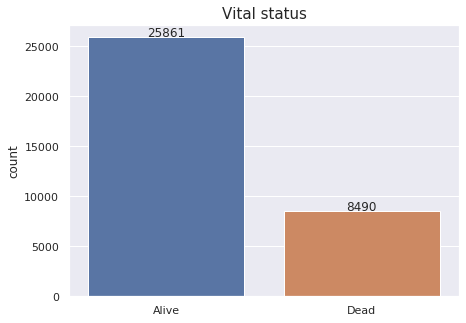

In [103]:
ax = sns.countplot(data=df, x='NEWVITALSTATUS')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [104]:
df['NEWVITALSTATUS'] = df['NEWVITALSTATUS'].astype('category')

In [105]:
df['ETHNICITY'].value_counts()

A    29481
C      981
Z      911
B      353
S      295
H      257
M      250
X      172
L      144
N      134
J      132
R       94
P       83
K       44
G       32
D       22
F       18
E       14
0        7
8        2
Name: ETHNICITY, dtype: int64

In [106]:
def ethnicity(value):
    if value == 'A':
        return 'White British'
    elif value == 'C':
        return 'Other white background'
    elif value == 'S':
        return 'Other ethnic group'
    elif value == 'B':
        return 'White Irish'
    elif value == 'H':
        return 'Asian Indian'
    elif value == 'M':
        return 'Black Caribbean'
    elif value == 'N':
        return 'Black African'
    elif value == 'J':
        return 'Asian Pakistani'
    elif value == 'L':
        return 'Other Asian background'
    elif value == 'P':
        return 'Other black background'
    elif value == 'R':
        return 'Chinese'
    elif value == 'G':
        return 'Other mixed background'
    elif value == 'K':
        return 'Asian Bangladeshi'
    elif value == 'D':
        return 'White and black Caribbean'
    elif value == 'F':
        return 'Mixed white and Asian'
    elif value == 'E':
        return 'Mixed white and black African'
    elif value == '0':
        return 'White'
    elif value == '8':
        return 'Other'
    elif value == 'Z' or value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['ETHNICITY'] = df['ETHNICITY'].apply(ethnicity)    
df['ETHNICITY'].value_counts()

White British                    29481
Other white background             981
White Irish                        353
Other ethnic group                 295
Asian Indian                       257
Black Caribbean                    250
Other Asian background             144
Black African                      134
Asian Pakistani                    132
Chinese                             94
Other black background              83
Asian Bangladeshi                   44
Other mixed background              32
White and black Caribbean           22
Mixed white and Asian               18
Mixed white and black African       14
White                                7
Other                                2
Name: ETHNICITY, dtype: int64

Note: Further details about the classification of this variable can be found in the lookup table "ZETHNICITY". X and Z have been removed since their meaning is "not known" and "not stated", respectively.

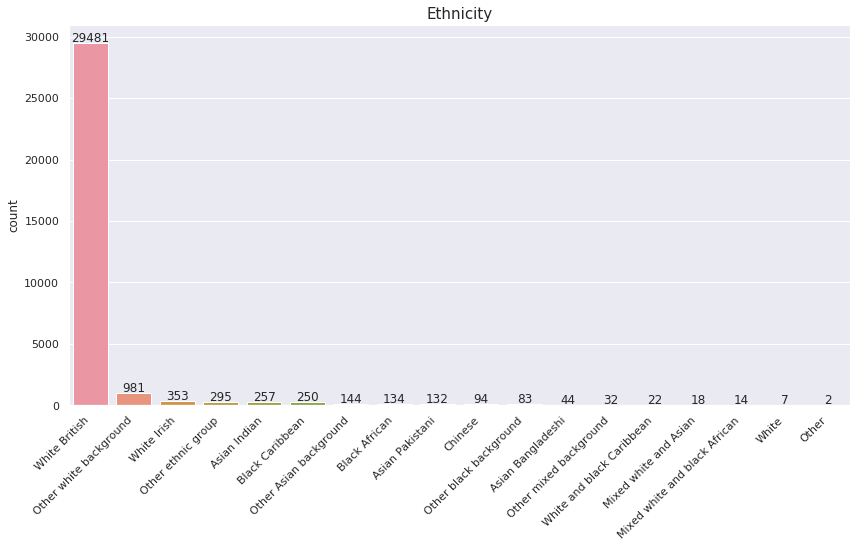

In [107]:
ax = sns.countplot(data=df, x='ETHNICITY', order=['White British','Other white background','White Irish',
                                                       'Other ethnic group','Asian Indian','Black Caribbean',
                                                       'Other Asian background','Black African','Asian Pakistani',
                                                       'Chinese','Other black background',
                                                       'Asian Bangladeshi','Other mixed background',
                                                       'White and black Caribbean','Mixed white and Asian',
                                                       'Mixed white and black African','White','Other'])
plt.gcf().set_size_inches(14,7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Ethnicity', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [108]:
df['ETHNICITY'] = df['ETHNICITY'].astype('category')

In [109]:
df['VITALSTATUSDATE'].sort_values().head(10)

29542    2013-01-02
32384    2013-01-12
30656    2013-01-14
25999    2013-01-14
31303    2013-01-14
34130    2013-01-14
27489    2013-01-16
29439    2013-01-16
33873    2013-01-18
33609    2013-01-18
Name: VITALSTATUSDATE, dtype: object

In [110]:
df['VITALSTATUSDATE'].sort_values().tail(10)

6550     2017-01-17
6551     2017-01-17
647      2017-01-18
11010    2017-01-19
3712     2017-01-19
11864    2017-01-20
10316    2017-01-25
13562    2017-01-25
25705    2017-01-26
37       2017-01-31
Name: VITALSTATUSDATE, dtype: object

In [111]:
df['SEX'].value_counts()

1    17641
2    16710
Name: SEX, dtype: int64

In [112]:
df['SEX'] = df['SEX'].astype(str)
def sex(value):
    if value == '1':
        return 'M'
    elif value == '2':
        return 'F'
    else:
        return value

df['SEX'] = df['SEX'].apply(sex)    
df['SEX'].value_counts()

M    17641
F    16710
Name: SEX, dtype: int64

Note: Further details about the classification of this variable can be found in the lookup table "ZSEX".

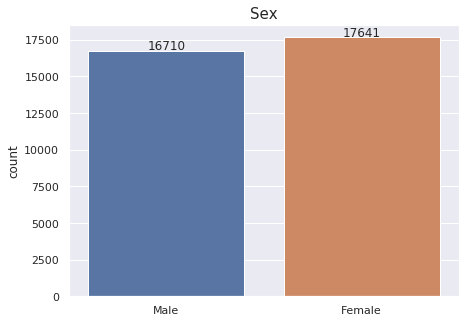

In [113]:
ax = sns.countplot(data=df, x='SEX')
ax.set_xticklabels(['Male', 'Female'])
ax.set_title('Sex', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [114]:
df['SEX'] = df['SEX'].astype('category')

I will also check if there are patients who have more than one tumour, and I will create a variable that indicates the number of tumours the patient has. Then I will continue exploring the variables from the SIM_AV_TUMOUR table.

In [115]:
df['PATIENTID'].value_counts().sort_values(ascending = False).head(10)

60013603    3
60057038    3
60014808    3
60008073    3
60057597    3
60020373    3
60045118    3
60016175    3
60019369    3
60011935    3
Name: PATIENTID, dtype: int64

In [116]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 3].sort_values(by='PATIENTID').head(10)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C187,C18,3,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C182,C18,3,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C183,C18,3,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3
4630,60009354,F,860009354,White British,A,2017-01-16,60009354,2013-05-14,C182,C18,3,3,2,0,3,G2,67,L0201,NaN,NaN,2013-05-14,8,5 - most deprived
4631,60009354,F,860009354,White British,A,2017-01-16,60065014,2013-05-14,C449,C18,3,4b,0,0,2,GX,68,L0201,NaN,NaN,2013-05-14,8,5 - most deprived
4632,60009354,F,860009354,White British,A,2017-01-16,60068675,2013-05-16,C187,C18,3,3,1,0,3,G2,69,L0201,NaN,NaN,2013-06-10,8,5 - most deprived
5547,60011935,M,860011935,White British,A,2017-01-16,60011935,2013-12-30,C182,C18,3,4a,1,NaN,?,G2,82,L0801,NaN,NaN,2013-12-30,8,2
5548,60011935,M,860011935,White British,A,2017-01-16,60065191,2013-12-30,C186,C18,3,4,NaN,1,4,G2,82,L0801,9,1,NaN,8,2
5549,60011935,M,860011935,White British,A,2017-01-16,60068687,2014-09-25,C182,C18,3,NaN,NaN,NaN,?,G1,82,L0801,NaN,NaN,NaN,8,2
6186,60013603,F,860013603,White British,A,2017-01-16,60068696,2015-08-07,C449,C18,3,NaN,NaN,NaN,?,G3,77,L0801,NaN,NaN,2015-08-07,8,3


In [117]:
df['NUMBER_TUMOURS'] = df.groupby('PATIENTID')['PATIENTID'].transform('size')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C61,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C449,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C251,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C180,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C20,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1


In [118]:
df['NUMBER_TUMOURS'].value_counts()

1    33044
2     1262
3       45
Name: NUMBER_TUMOURS, dtype: int64

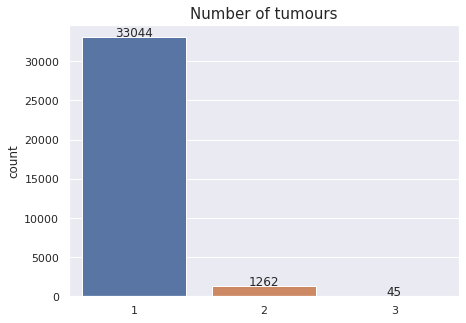

In [119]:
ax = sns.countplot(data=df, x='NUMBER_TUMOURS')
ax.set_title('Number of tumours', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

As we can see above, there are 33044 patients who only have one tumour, 1262 patients who have two tumours, and 45 patients who have three tumours. 

The data will be different for each tumour. Therefore, in order to avoid having multiple rows for each patient, for the rest of the variables (which contain data about each tumour specifically) I am going to create new variables that will contain the data of all the tumours in a way that each patient only has one row in the end.

In [120]:
df['SITE_ICD10_O2'].value_counts()

C187    10490
C180     7043
C182     4690
C184     2948
C189     1770
C183     1617
C186     1487
C185     1199
C181     1075
C20       525
C188      178
C61       156
C449      134
C19        94
D010       55
C445       48
C444       46
C679       40
D090       39
C541       37
D012       30
C833       25
C911       23
C259       21
C250       21
C159       20
D373       16
C155       16
C539       16
C900       14
C210       12
C920       12
C220       11
C80        11
C73        10
C830        9
C440        9
C169        9
C443        9
C450        9
D069        9
C857        8
C211        8
C821        8
C519        7
D371        7
D414        7
D320        7
C172        7
C221        7
C031        7
C23         6
C162        6
C859        6
C154        6
C838        6
C829        6
C435        5
C179        5
C062        5
C341        5
D471        5
C021        5
C160        5
C442        4
D469        4
C218        4
D071        4
C927        4
D372        4
C170        4
C851  

In [121]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
def site_icd(value):
    if value == 'C189' or value == 'nan': 
        return np.nan
    elif value == 'C180':
        return 'C180 Cecum'
    elif value == 'C181':
        return 'C181 Appendix'
    elif value == 'C182':
        return 'C182 Ascending colon'
    elif value == 'C183':
        return 'C183 Hepatic flexure'
    elif value == 'C184':
        return 'C184 Transverse colon'
    elif value == 'C185':
        return 'C185 Splenic flexure'
    elif value == 'C186':
        return 'C186 Descending colon'
    elif value == 'C187':
        return 'C187 Sigmoid colon'
    elif value == 'C188':
        return 'C188 Overlapping sites of colon'
    else:
        return np.nan

df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].apply(site_icd)
df['SITE_ICD10_O2'].value_counts()

C187 Sigmoid colon                 10490
C180 Cecum                          7043
C182 Ascending colon                4690
C184 Transverse colon               2948
C183 Hepatic flexure                1617
C186 Descending colon               1487
C185 Splenic flexure                1199
C181 Appendix                       1075
C188 Overlapping sites of colon      178
Name: SITE_ICD10_O2, dtype: int64

Note: further details about ICD-10 codes can be found in the lookup table "ZICD" and also here: https://www.icd10data.com/ICD10CM/Codes. C189 has been removed since its meaning is "unspecified".

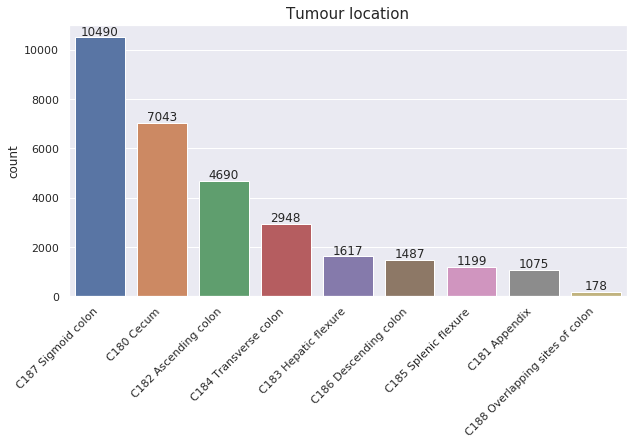

In [122]:
ax = sns.countplot(data=df, x='SITE_ICD10_O2', order=['C187 Sigmoid colon',
                                                           'C180 Cecum',
                                                           'C182 Ascending colon',
                                                           'C184 Transverse colon',
                                                           'C183 Hepatic flexure',
                                                           'C186 Descending colon',
                                                           'C185 Splenic flexure',
                                                           'C181 Appendix',
                                                           'C188 Overlapping sites of colon'])

plt.gcf().set_size_inches(10,5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_title('Tumour location', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

I am going to convert this variable so that I have all the data of each patient in a single row, regardless if the patient has only one tumour or more. In order to achieve it, I will create one new variable for each of the categories that the original variable has (SITE_ICD10_O2 in this case), so that the data of each tumour is recorded within each new variable. This will create duplicate rows for each patient, which will be removed at the end. 

In this example, SITE_ICD10_O2 indicates the location of the tumour in the colon. Thus, if a patient has one tumour in the cecum (C180) and another tumour in the ascending colon (C182) for example, the new variables C180 and C182 will be 1 and the other new variables will be 0 for this patient.

A similar process will be followed for the rest of the variables.

In [123]:
df['SITE_ICD10_O2'] = df['SITE_ICD10_O2'].astype(str)
df['C180'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C180 Cecum' in tumour for tumour in patient) else 0)
df['C181'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C181 Appendix' in tumour for tumour in patient) else 0)
df['C182'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C182 Ascending colon' in tumour for tumour in patient) else 0)
df['C183'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C183 Hepatic flexure' in tumour for tumour in patient) else 0)
df['C184'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C184 Transverse colon' in tumour for tumour in patient) else 0)
df['C185'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C185 Splenic flexure' in tumour for tumour in patient) else 0)
df['C186'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C186 Descending colon' in tumour for tumour in patient) else 0)
df['C187'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C187 Sigmoid colon' in tumour for tumour in patient) else 0)
df['C188'] = df.groupby('PATIENTID')['SITE_ICD10_O2'].transform(lambda patient: 1 if any('C188 Overlapping sites of colon' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,nan,C18,3,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,nan,C18,3,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,nan,C18,3,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C180 Cecum,C18,3,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,nan,C18,3,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0


In [124]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C187 Sigmoid colon,C18,3,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C182 Ascending colon,C18,3,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C183 Hepatic flexure,C18,3,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0


The original variable will be removed since I will not need it any more. A similar process will be followed for the rest of the variables.

In [125]:
df = df.drop(['SITE_ICD10_O2'], axis=1)

In [126]:
df['BEHAVIOUR_ICD10_O2'].value_counts()

3      34273
2         43
1         13
6          4
0          4
5          4
XXX        3
9          2
Name: BEHAVIOUR_ICD10_O2, dtype: int64

In [127]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
def behaviour(value):
    if value.startswith('0'):
        return 'Benign'
    elif value.startswith('1'):
        return 'Uncertain'
    elif value.startswith('2'):
        return 'In situ'
    elif value.startswith('3'):
        return 'Malignant'
    elif value.startswith('5'):
        return 'Micro-invasive'
    elif value.startswith('6'):
        return 'Malignant, metastatic/secondary site'
    elif value.startswith('9'):
        return 'Malignant, uncertain whether primary or metastatic'
    elif value.startswith('X') or value == 'nan':
        return np.nan
    else:
        return value

df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].apply(behaviour)
df['BEHAVIOUR_ICD10_O2'].value_counts()

Malignant                                             34273
In situ                                                  43
Uncertain                                                13
Micro-invasive                                            4
Benign                                                    4
Malignant, metastatic/secondary site                      4
Malignant, uncertain whether primary or metastatic        2
Name: BEHAVIOUR_ICD10_O2, dtype: int64

Note: further details about the classification of this variable can be found in the lookup table "ZBEHAVIOUR". X was removed since its meaning was "unknown/inapplicable".

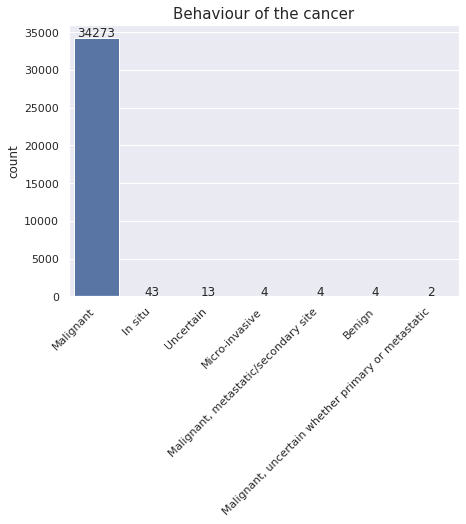

In [128]:
ax = sns.countplot(data=df, x='BEHAVIOUR_ICD10_O2', order=['Malignant','In situ','Uncertain','Micro-invasive',
                                                              'Malignant, metastatic/secondary site','Benign',
                                                              'Malignant, uncertain whether primary or metastatic'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_title('Behaviour of the cancer', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [129]:
df['BEHAVIOUR_ICD10_O2'] = df['BEHAVIOUR_ICD10_O2'].astype(str)
df['BEH_BENIGN'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Benign' in tumour for tumour in patient) else 0)
df['BEH_MALIG'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Malignant' in tumour for tumour in patient) else 0)
df['BEH_MICINV'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Micro-invasive' in tumour for tumour in patient) else 0)
df['BEH_INSITU'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('In situ' in tumour for tumour in patient) else 0)
df['BEH_UNCERT'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Uncertain' in tumour for tumour in patient) else 0)
df['BEH_MALIG_METAS'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Malignant, metastatic/secondary site' in tumour for tumour in patient) else 0)
df['BEH_MALIG_UNCERT'] = df.groupby('PATIENTID')['BEHAVIOUR_ICD10_O2'].transform(lambda patient: 1 if any('Malignant, uncertain whether primary or metastatic' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,Malignant,NaN,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,Malignant,NaN,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Malignant,4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Malignant,2c,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,Malignant,1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [130]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,Malignant,3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,Malignant,4b,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,Malignant,2a,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0


In [131]:
df = df.drop(['BEHAVIOUR_ICD10_O2'], axis=1)

In [132]:
df['T_BEST'].value_counts()

3      12995
4       4050
2       3420
4b      3081
1       2800
4a       871
1a       183
3a       163
3b       110
1b        88
2a        88
1c        76
2c        62
3c        41
is        27
a         23
2b        22
3d        10
0          9
1mi        7
1d         5
3s         4
2d         3
4d         2
2s         2
4c         2
1a1        1
X          1
2a2        1
T2         1
Name: T_BEST, dtype: int64

In [133]:
df['T_BEST'] = df['T_BEST'].astype('str')
def T_best(value):
    if value.startswith('0'):
        return 'T0'
    elif value.startswith('1') or value == 'T1':
        return 'T1'
    elif value.startswith('2') or value == 'T2':
        return 'T2'
    elif value.startswith('3'):
        return 'T3'
    elif value.startswith('4'):
        return 'T4'
    elif value == 'is':
        return 'Tis'
    elif value == 'X' or value == 'a' or value == 'nan':
        return np.nan
    else:
        return value

df['T_BEST'] = df['T_BEST'].apply(T_best)
df['T_BEST'].value_counts()

T3     13323
T4      8006
T2      3599
T1      3160
Tis       27
T0         9
Name: T_BEST, dtype: int64

Note: further details about the classification of this variable can be found here: https://www.cancer.org/es/tratamiento/como-comprender-su-diagnostico/estadificaciondelcancer.html.
X was removed since it means that the tumour could not be assessed.

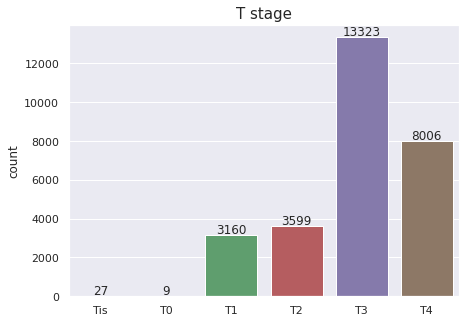

In [134]:
ax = sns.countplot(data=df, x='T_BEST', order=['Tis','T0', 'T1', 'T2', 'T3', 'T4'])
ax.set_title('T stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [135]:
df['T_BEST'] = df['T_BEST'].astype(str)
df['Tis'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('Tis' in tumour for tumour in patient) else 0)
df['T0'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('T0' in tumour for tumour in patient) else 0)
df['T1'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('T1' in tumour for tumour in patient) else 0)
df['T2'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('T2' in tumour for tumour in patient) else 0)
df['T3'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('T3' in tumour for tumour in patient) else 0)
df['T4'] = df.groupby('PATIENTID')['T_BEST'].transform(lambda patient: 1 if any('T4' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,NaN,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,NaN,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,T4,0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,T2,2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,T1,1a,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [136]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,T3,1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,T4,2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,T2,2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1


In [137]:
df = df.drop(['T_BEST'], axis=1)

In [138]:
df['N_BEST'].value_counts()

0      16163
1       6890
2       4323
1b       134
2a       106
2b       102
1a        81
3         44
1c        21
2c         5
1mi        4
X          3
3a         2
N0         1
Name: N_BEST, dtype: int64

In [139]:
df['N_BEST'] = df['N_BEST'].astype('str')
def N_best(value):
    if value.startswith('0') or value == 'N0':
        return 'N0'
    elif value.startswith('1'):
        return 'N1'
    elif value.startswith('2'):
        return 'N2'
    elif value.startswith('3'):
        return 'N3'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['N_BEST'] = df['N_BEST'].apply(N_best)
df['N_BEST'].value_counts()

N0    16164
N1     7130
N2     4536
N3       46
Name: N_BEST, dtype: int64

Note: further details about the classification of this variable can be found here: https://www.cancer.org/es/tratamiento/como-comprender-su-diagnostico/estadificaciondelcancer.html. X was removed since it means that the tumour could not be assessed.

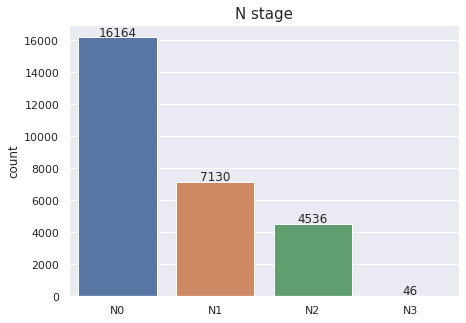

In [140]:
ax = sns.countplot(data=df, x='N_BEST', order=['N0', 'N1', 'N2', 'N3'])
ax.set_title('N stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [141]:
df['N_BEST'] = df['N_BEST'].astype(str)
df['N0'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: 1 if any('N0' in tumour for tumour in patient) else 0)
df['N1'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: 1 if any('N1' in tumour for tumour in patient) else 0)
df['N2'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: 1 if any('N2' in tumour for tumour in patient) else 0)
df['N3'] = df.groupby('PATIENTID')['N_BEST'].transform(lambda patient: 1 if any('N3' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,NaN,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,NaN,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,N0,0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,N2,0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,N1,0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [142]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,N1,0,3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,N2,0,3A,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,N2,0,3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0


In [143]:
df = df.drop(['N_BEST'], axis=1)

In [144]:
df['M_BEST'].value_counts()

0     22753
1      6007
1b      221
1a      185
X        11
1c        1
Name: M_BEST, dtype: int64

In [145]:
df['M_BEST'] = df['M_BEST'].astype('str')
def M_best(value):
    if value.startswith('0'):
        return 'M0'
    elif value.startswith('1'):
        return 'M1'
    elif value == 'X' or value == 'nan':
        return np.nan
    else:
        return value

df['M_BEST'] = df['M_BEST'].apply(M_best)
df['M_BEST'].value_counts()

M0    22753
M1     6414
Name: M_BEST, dtype: int64

Note: further details about the classification of this variable can be found here: https://www.cancer.org/es/tratamiento/como-comprender-su-diagnostico/estadificaciondelcancer.html. X was removed since it means that the tumour could not be assessed.

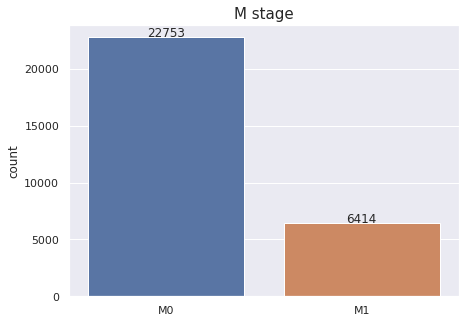

In [146]:
ax = sns.countplot(data=df, x='M_BEST', order=['M0', 'M1'])
ax.set_title('M stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [147]:
df['M_BEST'] = df['M_BEST'].astype(str)
df['M1'] = df.groupby('PATIENTID')['M_BEST'].transform(lambda patient: 1 if any('M1' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,?,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,?,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,M0,3B,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,M0,2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,M0,1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [148]:
df = df.drop(['M_BEST'], axis=1)

In [149]:
df['STAGE_BEST'].value_counts()

2      9032
3      7564
4      6474
1      4944
?      4419
2A      488
3B      374
1A      185
2B      176
3A      127
3C      115
U       106
4A       76
0        70
2C       69
1B       47
4B       38
4S        8
3S        8
1E        7
1S        7
2S        4
4C        3
0A        3
1C        3
1A2       1
2E        1
0IS       1
1B2       1
Name: STAGE_BEST, dtype: int64

In [150]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
def stage_best(value):
    if value.startswith('0'):
        return 'Stage 0'
    elif value.startswith('1'):
        return 'Stage 1'
    elif value.startswith('2'):
        return 'Stage 2'
    elif value.startswith('3'):
        return 'Stage 3'
    elif value.startswith('4'):
        return 'Stage 4'
    elif value == '?' or value == 'U' or value == 'nan':
        return np.nan
    else:
        return value

df['STAGE_BEST'] = df['STAGE_BEST'].apply(stage_best)
df['STAGE_BEST'].value_counts()

Stage 2    9770
Stage 3    8188
Stage 4    6599
Stage 1    5195
Stage 0      74
Name: STAGE_BEST, dtype: int64

Note: further details about the classification of this variable can be found in the lookup table "ZSTAGE". ? and U were removed since their meaning was "insufficient info" and "unstageable", respectively.

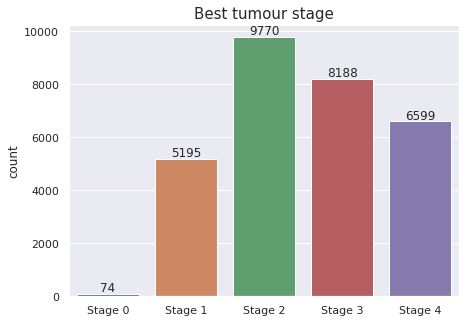

In [151]:
ax = sns.countplot(data=df, x='STAGE_BEST', order=['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
ax.set_title('Best tumour stage', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [152]:
df['STAGE_BEST'] = df['STAGE_BEST'].astype(str)
df['STAGE0'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: 1 if any('Stage 0' in tumour for tumour in patient) else 0)
df['STAGE1'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: 1 if any('Stage 1' in tumour for tumour in patient) else 0)
df['STAGE2'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: 1 if any('Stage 2' in tumour for tumour in patient) else 0)
df['STAGE3'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: 1 if any('Stage 3' in tumour for tumour in patient) else 0)
df['STAGE4'] = df.groupby('PATIENTID')['STAGE_BEST'].transform(lambda patient: 1 if any('Stage 4' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,GX,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Stage 3,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Stage 2,GX,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,Stage 1,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [153]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,Stage 3,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,Stage 3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,Stage 3,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0


In [154]:
df = df.drop(['STAGE_BEST'], axis=1)

In [155]:
df['GRADE'].value_counts()

G2    20748
GX     6534
G3     4720
G1     2088
G4       68
Name: GRADE, dtype: int64

In [156]:
df['GRADE'] = df['GRADE'].astype(str)
def grade(value):
    if value == 'GX' or value == 'nan':
        return np.nan
    else:
        return value

df['GRADE'] = df['GRADE'].apply(grade)
df['GRADE'].value_counts()

G2    20748
G3     4720
G1     2088
G4       68
Name: GRADE, dtype: int64

Note: further details about the classification of this variable can be found in the lookup table "ZGRADE". GX was removed since it means "Fake lookup for X".

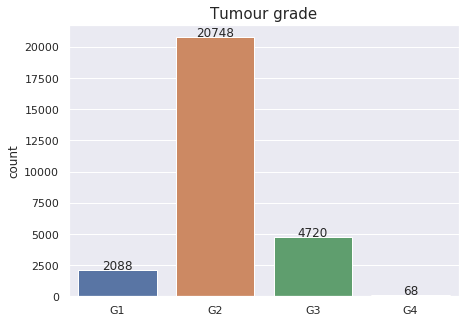

In [157]:
ax = sns.countplot(data=df, x='GRADE', order=['G1', 'G2', 'G3', 'G4'])
ax.set_title('Tumour grade', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [158]:
df['GRADE'] = df['GRADE'].astype(str)
df['GRADE1'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: 1 if any('G1' in tumour for tumour in patient) else 0)
df['GRADE2'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: 1 if any('G2' in tumour for tumour in patient) else 0)
df['GRADE3'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: 1 if any('G3' in tumour for tumour in patient) else 0)
df['GRADE4'] = df.groupby('PATIENTID')['GRADE'].transform(lambda patient: 1 if any('G4' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,G2,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,G2,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,nan,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,G2,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [159]:
df[df['PATIENTID'] == 60008073]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4
4136,60008073,M,860008073,White British,A,2017-01-16,60008073,2015-03-13,C18,G2,73,L1001,NaN,NaN,2015-03-14,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4137,60008073,M,860008073,White British,A,2017-01-16,60064929,2015-03-13,C18,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4138,60008073,M,860008073,White British,A,2017-01-16,60068671,2015-03-13,C18,G2,74,L1001,NaN,NaN,2015-03-13,8,3,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [160]:
df = df.drop(['GRADE'], axis=1)

In [161]:
df['AGE'].describe()

count    34351.000000
mean        70.950424
std         13.431867
min          0.000000
25%         64.000000
50%         73.000000
75%         81.000000
max        105.000000
Name: AGE, dtype: float64

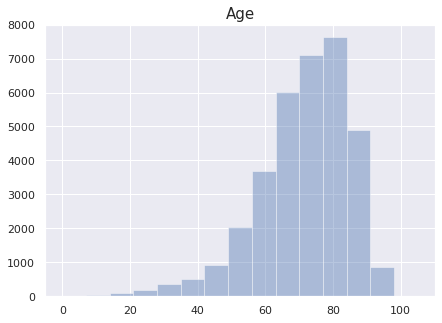

In [162]:
ax = sns.distplot(df['AGE'], hist=True, kde=False, bins=15)
ax.set_title('Age', fontsize=15)
ax.set_xlabel('');

In [163]:
df['AGE'].sort_values().head(30)

34350     0
26027     0
24781     3
12313     8
12454     8
21795     8
2065      8
11543     8
7027      9
17452     9
23740     9
17854    10
20379    10
8057     10
28352    10
22237    11
15901    11
18731    11
11224    11
2933     11
9862     11
9864     12
5702     12
1318     12
17301    12
32251    12
9134     13
20219    13
12511    13
11049    13
Name: AGE, dtype: int64

Since the age of the patient might be different for each tumour of the patient, I will create a variable with the median age of the patient.

In [164]:
df['AGE_MEDIAN'] = df.groupby('PATIENTID')['AGE'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,AGE,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,79,L1001,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,86,L1701,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,77,L0801,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,62,L1001,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,63,L1001,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0


In [165]:
df['AGE_MEDIAN'].describe()

count    34351.000000
mean        70.949608
std         13.383003
min          0.000000
25%         64.000000
50%         73.000000
75%         81.000000
max        105.000000
Name: AGE_MEDIAN, dtype: float64

As we can see, the variables "AGE" and "AGE_MEDIAN" are very similar.

In [166]:
df = df.drop(['AGE'], axis=1)

In [167]:
df['CREG_CODE'].value_counts()

L0801    6837
L1001    5358
L0201    4535
L1701    4511
L0401    4152
L1201    3742
L0301    3259
L0901    1957
Name: CREG_CODE, dtype: int64

In [168]:
def creg(value):
    if value == 'L0801':
        return 'L0801 Thames Cancer Registry'
    elif value == 'L0201':
        return 'L0201 Northern & Yorkshire Cancer Registry & Information Service'
    elif value == 'L0301':
        return 'L0301 Trent Cancer Registry'
    elif value == 'L1201':
        return 'L1201 West Midlands Cancer Intelligence Unit'
    elif value == 'L0401':
        return 'L0401 Eastern Cancer Registration & Information Centre'
    elif value == 'L1701':
        return 'L1701 North West Cancer Intelligence Service'
    elif value == 'L1001':
        return 'L1001 South West Cancer Intelligence Service'
    elif value == 'L0901':
        return 'L0901 Oxford Cancer Intelligence Unit'
    elif value == 'nan':
        return np.nan
    else:
        return value

df['CREG_CODE'] = df['CREG_CODE'].apply(creg)
df['CREG_CODE'].value_counts()

L0801 Thames Cancer Registry                                        6837
L1001 South West Cancer Intelligence Service                        5358
L0201 Northern & Yorkshire Cancer Registry & Information Service    4535
L1701 North West Cancer Intelligence Service                        4511
L0401 Eastern Cancer Registration & Information Centre              4152
L1201 West Midlands Cancer Intelligence Unit                        3742
L0301 Trent Cancer Registry                                         3259
L0901 Oxford Cancer Intelligence Unit                               1957
Name: CREG_CODE, dtype: int64

Note: further details about the classification of this variable can be found in the file "CPRD Cancer Registration Dictionary Set 17 up to 2016 v8.1".

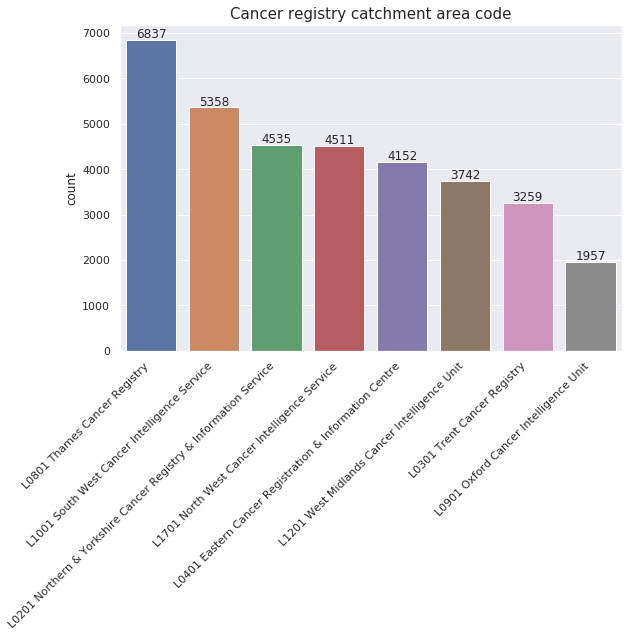

In [169]:
ax = sns.countplot(data=df, x='CREG_CODE', order=['L0801 Thames Cancer Registry',
                                                     'L1001 South West Cancer Intelligence Service',
                                                     'L0201 Northern & Yorkshire Cancer Registry & Information Service',
                                                     'L1701 North West Cancer Intelligence Service',                                                     
                                                     'L0401 Eastern Cancer Registration & Information Centre',
                                                     'L1201 West Midlands Cancer Intelligence Unit',                                                     
                                                     'L0301 Trent Cancer Registry',
                                                     'L0901 Oxford Cancer Intelligence Unit'])

plt.gcf().set_size_inches(9,6)
ax.set_title('Cancer registry catchment area code', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = 'right')
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, height, ha='center')

In [170]:
df['L0801'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L0801 Thames Cancer Registry' in tumour for tumour in patient) else 0)
df['L1001'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L1001 South West Cancer Intelligence Service' in tumour for tumour in patient) else 0)
df['L1701'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L1701 North West Cancer Intelligence Service' in tumour for tumour in patient) else 0)
df['L0201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L0201 Northern & Yorkshire Cancer Registry & Information Service' in tumour for tumour in patient) else 0)
df['L0401'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L0401 Eastern Cancer Registration & Information Centre' in tumour for tumour in patient) else 0)
df['L1201'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L1201 West Midlands Cancer Intelligence Unit' in tumour for tumour in patient) else 0)
df['L0301'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L0301 Trent Cancer Registry' in tumour for tumour in patient) else 0)
df['L0901'] = df.groupby('PATIENTID')['CREG_CODE'].transform(lambda patient: 1 if any('L0901 Oxford Cancer Intelligence Unit' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CREG_CODE,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,L1001 South West Cancer Intelligence Service,NaN,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,L1701 North West Cancer Intelligence Service,9,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,L0801 Thames Cancer Registry,Z,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,L1001 South West Cancer Intelligence Service,Cm,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,L1001 South West Cancer Intelligence Service,9,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0


In [171]:
df = df.drop(['CREG_CODE'], axis=1)

In [172]:
df['CANCERCAREPLANINTENT'].value_counts()

C     9452
Z     2374
9     1840
X      656
Cm     187
Zm      35
Name: CANCERCAREPLANINTENT, dtype: int64

In [173]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
def planintent(value):
    if value.startswith('C'):
        return 'Curative'
    elif value.startswith('Z'):
        return 'Non-curative'
    elif value == 'X':
        return 'No active treatment'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].apply(planintent)
df['CANCERCAREPLANINTENT'].value_counts()

Curative               9639
Non-curative           2409
No active treatment     656
Name: CANCERCAREPLANINTENT, dtype: int64

Note: further details about the classification of this variable can be found in the lookup table "ZCANCERCAREPLANINTENT". 9 was removed since it means "Not known".

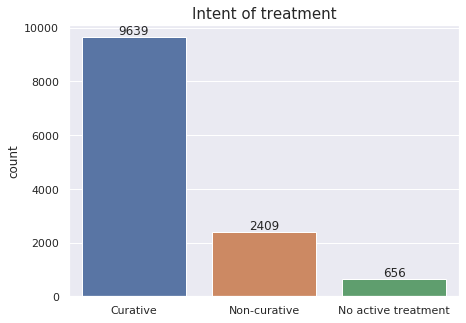

In [174]:
ax = sns.countplot(data=df, x='CANCERCAREPLANINTENT', order=['Curative','Non-curative','No active treatment'])
ax.set_title('Intent of treatment', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [175]:
df['CANCERCAREPLANINTENT'] = df['CANCERCAREPLANINTENT'].astype(str)
df['CURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: 1 if any('Curative' in tumour for tumour in patient) else 0)
df['NON_CURATIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: 1 if any('Non-curative' in tumour for tumour in patient) else 0)
df['NO_ACTIVE_TREAT'] = df.groupby('PATIENTID')['CANCERCAREPLANINTENT'].transform(lambda patient: 1 if any('No active treatment' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,CANCERCAREPLANINTENT,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,nan,2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,nan,0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,Non-curative,0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,Curative,0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,nan,0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0


In [176]:
df = df.drop(['CANCERCAREPLANINTENT'], axis=1)

In [177]:
df['PERFORMANCESTATUS'].value_counts()

0     4670
9     3924
1     2721
2     1275
3      790
4      192
1m     111
2m      41
3m      14
4m       3
Name: PERFORMANCESTATUS, dtype: int64

In [178]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
def perfstatus(value):
    if value.startswith('0'):
        return 'ECOG0'
    elif value.startswith('1'):
        return 'ECOG1'
    elif value.startswith('2'):
        return 'ECOG2'
    elif value.startswith('3'):
        return 'ECOG3'
    elif value.startswith('4'):
        return 'ECOG4'
    elif value == '9' or value == 'nan':
        return np.nan
    else:
        return value

df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].apply(perfstatus)
df['PERFORMANCESTATUS'].value_counts()

ECOG0    4670
ECOG1    2832
ECOG2    1316
ECOG3     804
ECOG4     195
Name: PERFORMANCESTATUS, dtype: int64

Note: further details about the classification of this variable can be found here: http://www.npcrc.org/files/news/ECOG_performance_status.pdf. 9 was removed since it means "Not known".

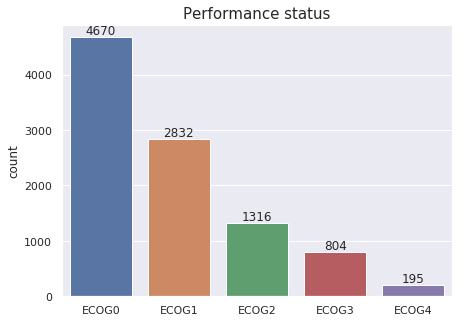

In [179]:
ax = sns.countplot(data=df, x='PERFORMANCESTATUS', order=['ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4'])
ax.set_title('Performance status', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, height, ha='center')

In [180]:
df['PERFORMANCESTATUS'] = df['PERFORMANCESTATUS'].astype(str)
df['ECOG0'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: 1 if any('ECOG0' in tumour for tumour in patient) else 0)
df['ECOG1'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: 1 if any('ECOG1' in tumour for tumour in patient) else 0)
df['ECOG2'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: 1 if any('ECOG2' in tumour for tumour in patient) else 0)
df['ECOG3'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: 1 if any('ECOG3' in tumour for tumour in patient) else 0)
df['ECOG4'] = df.groupby('PATIENTID')['PERFORMANCESTATUS'].transform(lambda patient: 1 if any('ECOG4' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,PERFORMANCESTATUS,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,ECOG2,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,ECOG0,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,ECOG0,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,ECOG0,NaN,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,ECOG0,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [181]:
df = df.drop(['PERFORMANCESTATUS'], axis=1)

In [182]:
pd.set_option('display.max_rows', 20) 

In [183]:
df['DATE_FIRST_SURGERY'].sort_values().dropna()

2458     1998-01-27
22182    2012-12-22
2498     2013-01-01
4861     2013-01-01
1919     2013-01-01
            ...    
11381    2016-09-18
651      2016-09-24
24633    2016-10-04
4890     2016-10-10
14529    2016-11-02
Name: DATE_FIRST_SURGERY, Length: 28543, dtype: object

In [184]:
pd.set_option('display.max_rows', None) 

Now I am going to create a variable that will indicate the time elapsed between the date of diagnosis and the date of the first surgery.

In [185]:
df['DATE_FIRST_SURGERY'] = pd.to_datetime(df['DATE_FIRST_SURGERY'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['DIAG_TO_SURG'] = df['DATE_FIRST_SURGERY'] - df['DIAGNOSISDATEBEST']
df['DIAG_TO_SURG_DAYS'] = df['DIAG_TO_SURG'] / np.timedelta64(1, 'D')
df[['DIAGNOSISDATEBEST', 'DATE_FIRST_SURGERY', 'DIAG_TO_SURG', 'DIAG_TO_SURG_DAYS']].head(10)

,DIAGNOSISDATEBEST,DATE_FIRST_SURGERY,DIAG_TO_SURG,DIAG_TO_SURG_DAYS
0,2013-03-07,2013-07-05,120 days,120.0
1,2014-10-23,2014-10-23,0 days,0.0
2,2014-01-08,2014-01-08,0 days,0.0
3,2015-09-20,NaT,NaT,NaN
4,2015-11-20,2015-12-19,29 days,29.0
5,2014-12-17,2014-12-17,0 days,0.0
6,2014-12-15,2014-12-15,0 days,0.0
7,2015-05-04,NaT,NaT,NaN
8,2013-11-28,NaT,NaT,NaN
9,2015-04-15,2015-05-22,37 days,37.0


In [186]:
df['DIAG_TO_SURG_DAYS'].describe()

count    28543.000000
mean        15.746207
std         53.820459
min      -6295.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS, dtype: float64

In [187]:
df['DIAG_TO_SURG_DAYS'].sort_values().head(40)

2458    -6295.0
17248     -65.0
6808      -63.0
17726     -62.0
7014      -62.0
25483     -51.0
12970     -50.0
32848     -37.0
22182     -37.0
6245      -37.0
23175     -37.0
25134     -36.0
14230     -36.0
26961     -35.0
11051     -35.0
15079     -35.0
21958     -34.0
22716     -31.0
2665      -29.0
12868     -29.0
26269     -29.0
31066     -27.0
16598     -25.0
24822     -25.0
8318      -25.0
17110     -25.0
23625     -25.0
25503     -19.0
25719     -17.0
17839     -16.0
5380      -16.0
554       -14.0
7303      -13.0
26377     -12.0
34034     -12.0
20590      -8.0
26875      -8.0
10359      -8.0
8154       -8.0
24192      -7.0
Name: DIAG_TO_SURG_DAYS, dtype: float64

In [188]:
df['DIAG_TO_SURG_DAYS'].sort_values(ascending=False).head(40)

5310     855.0
16157    790.0
4890     729.0
11381    691.0
637      620.0
17942    620.0
10679    591.0
25178    590.0
16001    578.0
14571    540.0
18415    517.0
1130     514.0
3852     512.0
2508     501.0
22629    500.0
16998    495.0
18075    488.0
31830    482.0
23001    481.0
18167    480.0
4350     479.0
17443    473.0
17401    444.0
1072     443.0
14548    429.0
11888    425.0
7801     419.0
10835    418.0
32876    418.0
9135     417.0
469      402.0
3567     398.0
25177    395.0
32968    390.0
33447    389.0
6727     388.0
25601    384.0
31418    373.0
30758    371.0
10253    370.0
Name: DIAG_TO_SURG_DAYS, dtype: float64

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


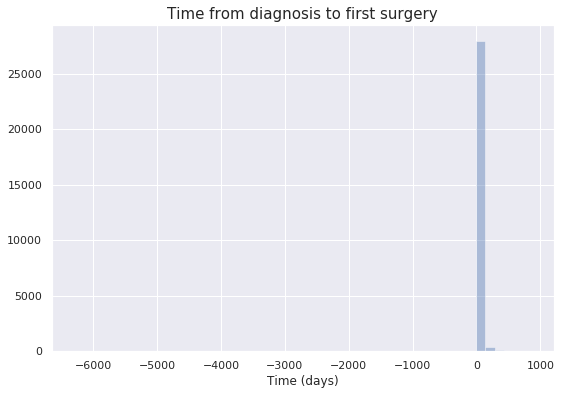

In [189]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(9,6)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

Now I will remove the negative values.

In [190]:
def diag_to_surg(value):
    if value < 0:
        return np.nan
    else:
        return value
df['DIAG_TO_SURG_DAYS'] = df['DIAG_TO_SURG_DAYS'].apply(diag_to_surg)    
df['DIAG_TO_SURG_DAYS'].describe()

count    28438.000000
mean        16.069871
std         38.767483
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS, dtype: float64

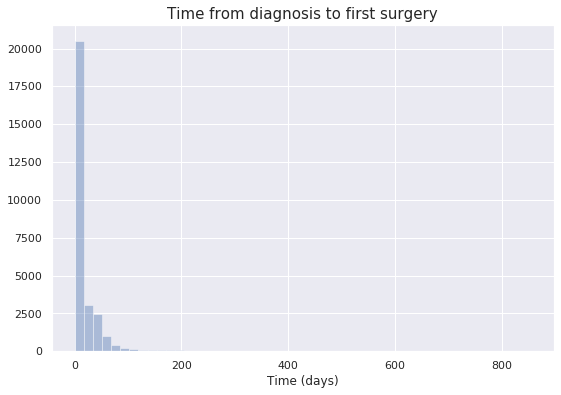

In [191]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(9,6)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

Since the time elapsed between the date of diagnosis and the date of the first surgery might be different for each tumour of the patient, I will create a variable with the median time elapsed for each patient.

In [192]:
df['DIAG_TO_SURG_DAYS_MEDIAN'] = df.groupby('PATIENTID')['DIAG_TO_SURG_DAYS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_DAYS_MEDIAN
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,8,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120 days,120.0,120.0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,8,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0 days,0.0,0.0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0 days,0.0,0.0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,8,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,NaT,NaN,NaN
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,8,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,29 days,29.0,29.0


In [193]:
df['DIAG_TO_SURG_DAYS_MEDIAN'] = df['DIAG_TO_SURG_DAYS_MEDIAN'].fillna(df['DIAG_TO_SURG_DAYS_MEDIAN'].median())
df['DIAG_TO_SURG_DAYS_MEDIAN'].describe()

count    34351.000000
mean        13.371357
std         35.595322
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        855.000000
Name: DIAG_TO_SURG_DAYS_MEDIAN, dtype: float64

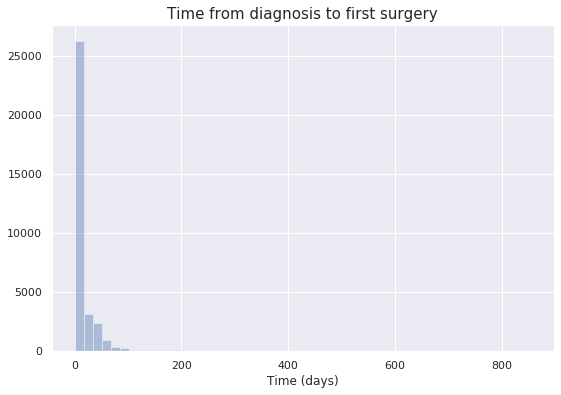

In [194]:
ax = sns.distplot(df['DIAG_TO_SURG_DAYS_MEDIAN'], hist=True, kde=False, bins=50)
plt.gcf().set_size_inches(9,6)
ax.set_title('Time from diagnosis to first surgery', fontsize=15)
ax.set_xlabel('Time (days)', fontsize=12);

In [195]:
df['LATERALITY'].value_counts()

8    34332
L       10
R        7
9        1
Name: LATERALITY, dtype: int64

In [196]:
df['LATERALITY'] = df['LATERALITY'].astype(str)
def laterality(value):
    if value.startswith('8') or value.startswith('9') or value == 'nan':
        return np.nan
    elif value == 'R':
        return 'Right'
    elif value == 'L':
        return 'Left'
    else:
        return value

df['LATERALITY'] = df['LATERALITY'].apply(laterality)
df['LATERALITY'].value_counts()

Left     10
Right     7
Name: LATERALITY, dtype: int64

Note: further details about the classification of this variable can be found in the lookup table "ZLATERALITY". 8 and 9 were removed since their meaning was "not applicable" and "not known", respectively.

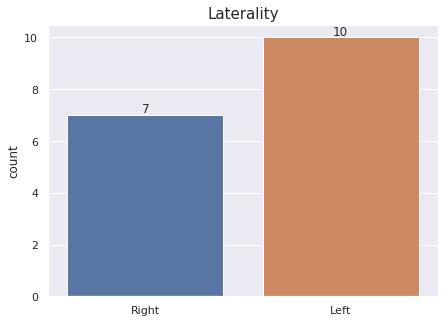

In [197]:
ax = sns.countplot(data=df, x='LATERALITY')
ax.set_title('Laterality', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, height, ha='center')

Since this information is only available for 17 records after removing the values that are not known or not applicable, I am going to remove this variable from the analysis. 

In [198]:
df = df.drop(['LATERALITY'], axis=1)

In [199]:
df['QUINTILE_2015'].value_counts()

2                     7859
1 - least deprived    7601
3                     7156
4                     6325
5 - most deprived     5410
Name: QUINTILE_2015, dtype: int64

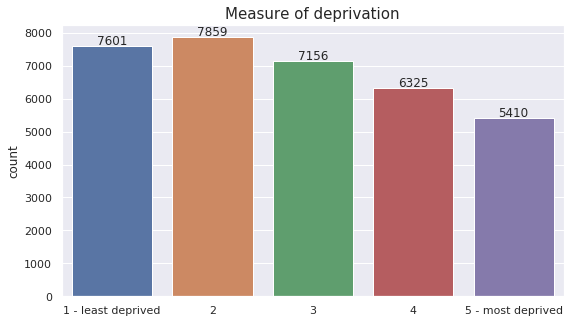

In [200]:
ax = sns.countplot(data=df, x='QUINTILE_2015', order=['1 - least deprived', '2', '3', '4', '5 - most deprived'])

plt.gcf().set_size_inches(9,5)
ax.set_title('Measure of deprivation', fontsize=15)
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, height, ha='center')

In [201]:
df['QUINTILE_2015'] = df['QUINTILE_2015'].astype(str)
df['DEPR1'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: 1 if any('1 - least deprived' in tumour for tumour in patient) else 0)
df['DEPR2'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: 1 if any('2' in tumour for tumour in patient) else 0)
df['DEPR3'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: 1 if any('3' in tumour for tumour in patient) else 0)
df['DEPR4'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: 1 if any('4' in tumour for tumour in patient) else 0)
df['DEPR5'] = df.groupby('PATIENTID')['QUINTILE_2015'].transform(lambda patient: 1 if any('5 - most deprived' in tumour for tumour in patient) else 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,QUINTILE_2015,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_DAYS_MEDIAN,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120 days,120.0,120.0,0,0,0,1,0
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,1 - least deprived,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0 days,0.0,0.0,1,0,0,0,0
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0 days,0.0,0.0,0,0,1,0,0
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,1 - least deprived,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,NaT,NaN,0.0,1,0,0,0,0
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,29 days,29.0,29.0,0,0,1,0,0


In [202]:
df = df.drop(['QUINTILE_2015'], axis=1)

Now I will  create a variable that will indicate the time elapsed between the date of diagnosis and the date when the patient died, or if the patient is alive, the last date of follow-up.

In [203]:
df['VITALSTATUSDATE'] = pd.to_datetime(df['VITALSTATUSDATE'])
df['DIAGNOSISDATEBEST'] = pd.to_datetime(df['DIAGNOSISDATEBEST'])
df['CANCER_TIME'] = df['VITALSTATUSDATE'] - df['DIAGNOSISDATEBEST']
df['CANCER_YEARS'] = df['CANCER_TIME'] / np.timedelta64(1, 'Y')
df[['VITALSTATUSDATE', 'DIAGNOSISDATEBEST', 'CANCER_TIME', 'CANCER_YEARS']].head()

,VITALSTATUSDATE,DIAGNOSISDATEBEST,CANCER_TIME,CANCER_YEARS
0,2017-01-14,2013-03-07,1409 days,3.857711
1,2017-01-16,2014-10-23,816 days,2.234132
2,2017-01-16,2014-01-08,1104 days,3.022649
3,2017-01-16,2015-09-20,484 days,1.325147
4,2017-01-16,2015-11-20,423 days,1.158135


In [204]:
df['CANCER_YEARS'].describe()

count    34351.000000
mean         2.083202
std          1.115067
min          0.000000
25%          1.256699
50%          2.078071
75%          3.008960
max          4.043889
Name: CANCER_YEARS, dtype: float64

In [205]:
# dead = df[df['NEWVITALSTATUS'] == 'D']
# dead.head()

In [206]:
# ax = sns.distplot(dead['CANCER_YEARS'], hist = True, kde = False, bins = 50)
# ax.set_title('Deaths - Follow-up time (years)', fontsize=15)
# ax.set_xlabel('');

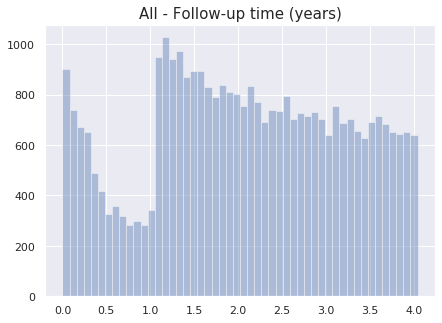

In [207]:
ax = sns.distplot(df['CANCER_YEARS'], hist=True, kde=False, bins=50)
ax.set_title('All - Follow-up time (years)', fontsize=15)
ax.set_xlabel('');

Since the time since the date of diagnosis until the date the patient died (or if the patient is alive, the last date of follow-up) might be different for each tumour of the patient, I will create a variable with the median time elapsed for each patient. 

In [208]:
df['CANCER_YEARS_MEDIAN'] = df.groupby('PATIENTID')['CANCER_YEARS'].transform(np.median)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,VITALSTATUSDATE,TUMOURID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,DATE_FIRST_SURGERY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG,DIAG_TO_SURG_DAYS,DIAG_TO_SURG_DAYS_MEDIAN,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_TIME,CANCER_YEARS,CANCER_YEARS_MEDIAN
0,10001000,F,810001000,White British,A,2017-01-14,10335820,2013-03-07,C18,2013-07-05,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120 days,120.0,120.0,0,0,0,1,0,1409 days,3.857711,3.857711
1,10001128,F,810001128,NaN,A,2017-01-16,10335828,2014-10-23,C18,2014-10-23,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0 days,0.0,0.0,1,0,0,0,0,816 days,2.234132,2.234132
2,10001482,F,810001482,NaN,A,2017-01-16,10335860,2014-01-08,C18,2014-01-08,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0 days,0.0,0.0,0,0,1,0,0,1104 days,3.022649,3.022649
3,10001901,M,810001901,NaN,A,2017-01-16,10335884,2015-09-20,C18,NaT,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,NaT,NaN,0.0,1,0,0,0,0,484 days,1.325147,1.325147
4,10002351,F,810002351,NaN,A,2017-01-16,10335912,2015-11-20,C18,2015-12-19,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,29 days,29.0,29.0,0,0,1,0,0,423 days,1.158135,1.158135


In [209]:
df['CANCER_YEARS_MEDIAN'].describe()

count    34351.000000
mean         2.083197
std          1.113787
min          0.000000
25%          1.259437
50%          2.080809
75%          3.006222
max          4.043889
Name: CANCER_YEARS_MEDIAN, dtype: float64

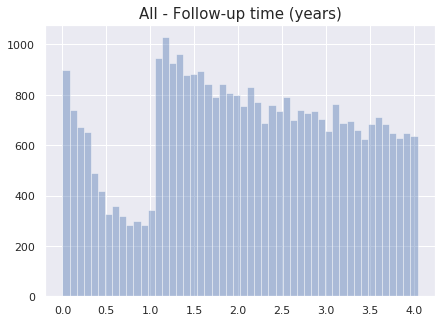

In [210]:
ax = sns.distplot(df['CANCER_YEARS_MEDIAN'], hist=True, kde=False, bins=50)
ax.set_title('All - Follow-up time (years)', fontsize=15)
ax.set_xlabel('');

After exploring and reclassifying all the variables, I am going to select the variables that will be needed for the rest of the analysis.

In [211]:
df.columns

Index(['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS',
       'VITALSTATUSDATE', 'TUMOURID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'DATE_FIRST_SURGERY', 'NUMBER_TUMOURS', 'C180',
       'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188',
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT', 'Tis', 'T0', 'T1', 'T2', 'T3',
       'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4',
       'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201',
       'L0301', 'L0901', 'CURATIVE_TREAT', 'NON_CURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4',
       'DIAG_TO_SURG', 'DIAG_TO_SURG_DAYS', 'DIAG_TO_SURG_DAYS_MEDIAN',
       'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_TIME',
       'CANCER_YEARS', 'CANCER_YEARS_MEDIAN'],
      dtype='object')

In [212]:
columns_selected = ['PATIENTID', 'SEX', 'LINKNUMBER', 'ETHNICITY', 'NEWVITALSTATUS', 'NUMBER_TUMOURS', 
       'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT',
       'Tis', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 
       'CURATIVE_TREAT', 'NON_CURATIVE_TREAT', 'NO_ACTIVE_TREAT', 
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 
       'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAGNOSISDATEBEST']
df = df[columns_selected]
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAGNOSISDATEBEST
0,10001000,F,810001000,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,2013-03-07
1,10001128,F,810001128,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,2014-10-23
2,10001482,F,810001482,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,2014-01-08
3,10001901,M,810001901,NaN,A,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,2015-09-20
4,10002351,F,810002351,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,2015-11-20


In [213]:
df.shape

(34351, 67)

I am also going to remove the duplicates that were originated as a result of the new variables I have created.

In [214]:
df = df.drop_duplicates()
df.shape

(34062, 67)

In [215]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].count()

PATIENTID                   742
SEX                         742
LINKNUMBER                  742
ETHNICITY                   690
NEWVITALSTATUS              742
NUMBER_TUMOURS              742
C180                        742
C181                        742
C182                        742
C183                        742
C184                        742
C185                        742
C186                        742
C187                        742
C188                        742
BEH_BENIGN                  742
BEH_MALIG                   742
BEH_MICINV                  742
BEH_INSITU                  742
BEH_UNCERT                  742
BEH_MALIG_METAS             742
BEH_MALIG_UNCERT            742
Tis                         742
T0                          742
T1                          742
T2                          742
T3                          742
T4                          742
N0                          742
N1                          742
N2                          742
N3      

As we can see above, I have removed some duplicate entries but there are still some patients who have more than one row. This is due to the fact that I have not removed the variable "DIAGNOSISDATEBEST", which is still specific for each tumour. This variable will be needed in another notebook, so I am going to leave it for the moment and at the end I will remove it, as well as the remaining duplicate entries.

I am also going to check again the amount of missing data and the type of variables I have, as well as the memory usage I have.

In [216]:
df.isna().sum()

PATIENTID                      0
SEX                            0
LINKNUMBER                     0
ETHNICITY                   1986
NEWVITALSTATUS                 0
NUMBER_TUMOURS                 0
C180                           0
C181                           0
C182                           0
C183                           0
C184                           0
C185                           0
C186                           0
C187                           0
C188                           0
BEH_BENIGN                     0
BEH_MALIG                      0
BEH_MICINV                     0
BEH_INSITU                     0
BEH_UNCERT                     0
BEH_MALIG_METAS                0
BEH_MALIG_UNCERT               0
Tis                            0
T0                             0
T1                             0
T2                             0
T3                             0
T4                             0
N0                             0
N1                             0
N2        

In [217]:
df.dtypes

PATIENTID                            int64
SEX                               category
LINKNUMBER                           int64
ETHNICITY                         category
NEWVITALSTATUS                    category
NUMBER_TUMOURS                       int64
C180                                 int64
C181                                 int64
C182                                 int64
C183                                 int64
C184                                 int64
C185                                 int64
C186                                 int64
C187                                 int64
C188                                 int64
BEH_BENIGN                           int64
BEH_MALIG                            int64
BEH_MICINV                           int64
BEH_INSITU                           int64
BEH_UNCERT                           int64
BEH_MALIG_METAS                      int64
BEH_MALIG_UNCERT                     int64
Tis                                  int64
T0         

In [218]:
new_memory = df.memory_usage(deep=True).sum() / 1024 ** 2 
print(f'Memory used: {new_memory:.1f} MB')

Memory used: 17.0 MB


I am going to save this data frame in a new pickle file and I will merge it with another table in the next notebook.

In [219]:
df.to_pickle('./Data/avpat_avtum.pickle')